---
MAT421 - Applied Computational Methods

Arizona State University

Homework #9

Written by Edward Hayes

---
This notebook is a review and an elaboration of the topics covered in Chapter 21 from *Python Programming and Numerical Methods - A Guide for Engineers and Scientists*.

---
# Chapter 21. Numerical Integration
---

## 21.1 Numerical Integration Problem Statement

In order to numerically approximate the integral of a function, $f(x)$, over the interval $[a,b]$, a discrete **numerical grid** is used. The numerical grid, $x$, consists of $n+1$ points with spacing, $h=\frac{b-a}{n}$. Each point in $x$ is denoted as $x_i$ where $x_0=a$ and $x_n=b$. It is assumed that $f(x)$ can be calculated for any point of $x$ or that the values of $f(x_i)$ are given. The interval $[x_i,x_{i+1}]$ is a **subinterval** of $x$. Integral approximation methods use different shapes to calculate the exact area under $f(x)$ for each subinterval. By suming the area of each subinterval across the interval $[a,b]$ an approximation for the integral is made. 

In [21]:
import numpy as np

a = 0
b = np.pi
n = 11

x = np.linspace(a,b,n)
f = np.sin(x)

print('Numerical Grid, x:')
print(x)
print('\nCalculated Values of f(x):')
print(f)

Numerical Grid, x:
[0.         0.31415927 0.62831853 0.9424778  1.25663706 1.57079633
 1.88495559 2.19911486 2.51327412 2.82743339 3.14159265]

Calculated Values of f(x):
[0.00000000e+00 3.09016994e-01 5.87785252e-01 8.09016994e-01
 9.51056516e-01 1.00000000e+00 9.51056516e-01 8.09016994e-01
 5.87785252e-01 3.09016994e-01 1.22464680e-16]


## 21.2 Riemanns Integral

A Riemann Integral uses the sum of rectangular areas for each subinterval to approximate the integral from $[a,b]$. For the subinterval $[x_i,x_{i+1}]$, the width of the rectangle is the spacing $h=x_{i+1}-x_i$ and height is defined by the value of f(x). There are three heights to consider:

1.   The Left Endpoint
     $$f(x_i)$$

     Which gives the integral,
     $$\int_a^bf(x)dx≈\sum_{i=0}^{n-1}hf(x_i)$$

2.   The Right Endpoint
     $$f(x_{i+1})$$

     Which gives the integral,
     $$\int_a^bf(x)dx≈\sum_{i=0}^{n}hf(x_i)$$

3.   The Midpoint Rule
     $$f(\frac{x_{i+1}+x_i}{2})$$

     Which gives the integral,
     $$\int_a^bf(x)dx≈\sum_{i=0}^{n-1}hf(y_i)$$
     where
     $$y_i=\frac{x_{i+1}+x_i}{2}$$

The left and right endpoints result in less accuracy. This is due to the fact that endpoints will either over or under estimate the area under the subinterval as the slope of $f(x)$ changes.

For example, if $f(x)$ is increasing on the subinterval $[x_{i},x_{i+1}]$ than $f(x_{i+1})>f(x_i)$. Thus, if the left endpoint, $f(x_i)$, is used, the area under $f(x)$ will be an under estimation. Conversly, if the right endpoint, $f(x_{i+1})$, is used, the area under $f(x)$ will be an over estimation.

Using the midpoint rule will result in more accuracy. The midpoint rule both over and under approximates the area of the subinterval at the same time.

For example, if $f(x)$ is increasing on the subinterval $[x_{i},x_{i+1}]$ than $f(x_{i+1})>f(\frac{x_{i+1}+x_i}{2})>f(x_i)$. Thus, there will be an over estimation of area for the interval $[f(x_i),f(\frac{x_{i+1}+x_i}{2})]$ and an under estimation of the area for the interval $[f(\frac{x_{i+1}+x_i}{2}),f(x_{i+1})]$.

Additional, accuracy of the approximation can be increased by decreasing the width of the rectangle. The width can be decreased by adding more points to the numerical grid.


Actual Integral:  38

Number of Points:  10
Riemann Left:  27.200833206320166
Error:  10.799166793679834
Riemann Right:  50.31194431743127
Error:  12.31194431743127
Riemann Midpoint:  37.62211045064268
Error:  0.3778895493573202 


Number of Points:  20
Riemann Left:  32.69617329517114
Error:  5.303826704828857
Riemann Right:  43.64354171622377
Error:  5.643541716223773
Riemann Midpoint:  37.91508659387205
Error:  0.08491340612795284 


Number of Points:  30
Riemann Left:  34.48671461554884
Error:  3.5132853844511587
Riemann Right:  41.659128408652286
Error:  3.659128408652286
Riemann Midpoint:  37.96354207168014
Error:  0.036457928319862276 


Number of Points:  40
Riemann Left:  35.37365537598177
Error:  2.6263446240182304
Riemann Right:  40.7069887093151
Error:  2.706988709315098
Riemann Midpoint:  37.979839843188856
Error:  0.020160156811144248 


Number of Points:  50
Riemann Left:  35.90309500709564
Error:  2.0969049929043635
Riemann Right:  40.147992966279304
Error:  2.147992966

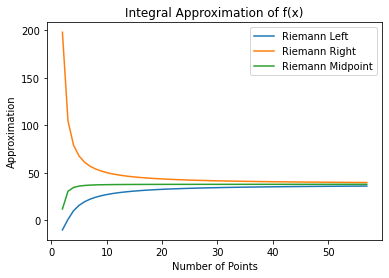

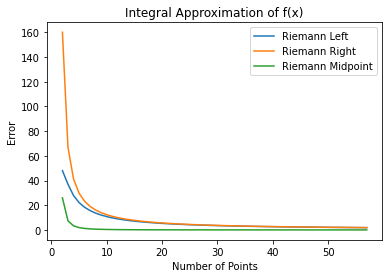

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def grid(a,b,n):
  h = (b-a)/(n-1)
  x = np.linspace(a,b,n)
  return h,x

def riemann_left(func,a,b,n):
  h,x = grid(a,b,n)
  return h*sum(func(x[0:n-1]))

def riemann_right(func,a,b,n):
  h,x = grid(a,b,n)
  return h*sum(func(x[1:n]))

def riemann_midpoint(func,a,b,n):
  h,x = grid(a,b,n)
  return h*sum(func((x[0:n-1]+x[1:n])/2))


start_point = 0
end_point = 2

f = lambda x: 5*(x**4)+6*(x**2)-5

f_int = lambda x: (x**5)+2*(x**3)-5*x

act_int = f_int(end_point)-f_int(start_point)

print('Actual Integral: ',act_int)

r_left = []
r_right = []
r_midpoint = []

r_left_error = []
r_right_error = []
r_midpoint_error = []

i = 0

error = 5
num_of_points = []
num_of_points.append(2)

while error > 0.01:

  r_left.append(riemann_left(f,start_point,end_point,num_of_points[i]))
  r_left_error.append(abs(act_int-r_left[i]))
  r_right.append(riemann_right(f,start_point,end_point,num_of_points[i]))
  r_right_error.append(abs(act_int-r_right[i]))
  r_midpoint.append(riemann_midpoint(f,start_point,end_point,num_of_points[i]))
  r_midpoint_error.append(abs(act_int-r_midpoint[i]))

  if num_of_points[i]%10==0:
    print('\nNumber of Points: ',num_of_points[i])
    print('Riemann Left: ',r_left[i])
    print('Error: ',r_left_error[i])
    print('Riemann Right: ',r_right[i])
    print('Error: ',r_right_error[i])
    print('Riemann Midpoint: ',r_midpoint[i])
    print('Error: ',r_midpoint_error[i],'\n')

  error = r_midpoint_error[i]
  num_of_points.append(num_of_points[i]+1)
  i += 1

num_of_points.pop()

plt.plot(num_of_points,r_left,label='Riemann Left')
plt.plot(num_of_points,r_right,label='Riemann Right')
plt.plot(num_of_points,r_midpoint,label='Riemann Midpoint')
plt.title('Integral Approximation of f(x)')
plt.xlabel('Number of Points')
plt.ylabel('Approximation')
plt.legend()
plt.show()

print('\n')

plt.plot(num_of_points,r_left_error,label='Riemann Left')
plt.plot(num_of_points,r_right_error,label='Riemann Right')
plt.plot(num_of_points,r_midpoint_error,label='Riemann Midpoint')
plt.title('Integral Approximation of f(x)')
plt.xlabel('Number of Points')
plt.ylabel('Error')
plt.legend()
plt.show()



## 21.3 Trapezoid Rule

The Trapezoid Rule uses a trapezoid to approximate the area under $f(x)$ for each subinterval. The corners of the trapezoid are at $(x_i,0)$, $(x_{i+1},0)$, $(x_i,f(x_i))$, and $(x_{i+1},f(x_{i+1}))$. The area of the trapezoid is given by $h\frac{f(x_i)+f(x_{i+1})}{2}$.

Thus the integral is,

$$\int_a^bf(x)dx≈\sum_{i=0}^{n-1}h\frac{f(x_i)+f(x_{i+1})}{2}$$

Overall, using the Trapezoid Rule results in the same accuracy as the Midpoint Rule.

Expanding and simplifying the Trapezoid Rule summation, the following computationally efficient equation is given,

$$\int_a^bf(x)dx≈\frac{h}{2}(f(x_0)+2(\sum_{i=0}^{n-1}f(x_i)+f(x_n))$$

Actual Integral:  38

Number of Points:  80
Riemann Left:  36.693371651781675
Error:  1.3066283482183252
Riemann Right:  39.32628304418674
Error:  1.326283044186738
Riemann Midpoint:  37.99508637735566
Error:  0.004913622644338034
Trapezoid:  38.009827347984206
Error:  0.00982734798420637 



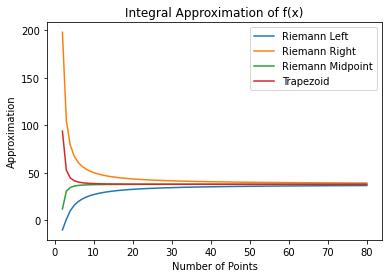

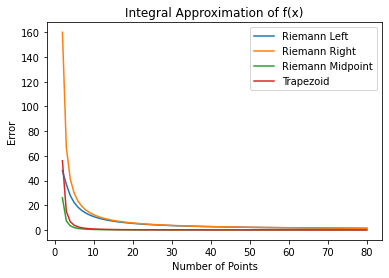

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def grid(a,b,n):
  h = (b-a)/(n-1)
  x = np.linspace(a,b,n)
  return h,x

def riemann_left(func,a,b,n):
  h,x = grid(a,b,n)
  return h*sum(func(x[0:n-1]))

def riemann_right(func,a,b,n):
  h,x = grid(a,b,n)
  return h*sum(func(x[1:n]))

def riemann_midpoint(func,a,b,n):
  h,x = grid(a,b,n)
  return h*sum(func((x[0:n-1]+x[1:n])/2))

def trapezoid(func,a,b,n):
  h,x = grid(a,b,n)
  return (h/2)*(func(x[0])+2*sum(func(x[1:n-1]))+f(x[n-1]))

start_point = 0
end_point = 2

f = lambda x: 5*(x**4)+6*(x**2)-5

f_int = lambda x: (x**5)+2*(x**3)-5*x

act_int = f_int(end_point)-f_int(start_point)

print('Actual Integral: ',act_int)

r_left = []
r_right = []
r_midpoint = []
i_trapezoid = []

r_left_error = []
r_right_error = []
r_midpoint_error = []
i_trapezoid_error = []

i = 0

error = 5
num_of_points = []
num_of_points.append(2)

while error > 0.01:

  r_left.append(riemann_left(f,start_point,end_point,num_of_points[i]))
  r_left_error.append(abs(act_int-r_left[i]))
  r_right.append(riemann_right(f,start_point,end_point,num_of_points[i]))
  r_right_error.append(abs(act_int-r_right[i]))
  r_midpoint.append(riemann_midpoint(f,start_point,end_point,num_of_points[i]))
  r_midpoint_error.append(abs(act_int-r_midpoint[i]))
  i_trapezoid.append(trapezoid(f,start_point,end_point,num_of_points[i]))
  i_trapezoid_error.append(abs(act_int-i_trapezoid[i]))

  error = i_trapezoid_error[i]
  num_of_points.append(num_of_points[i]+1)
  i += 1

num_of_points.pop()
i -= 1

print('\nNumber of Points: ',num_of_points[i])
print('Riemann Left: ',r_left[i])
print('Error: ',r_left_error[i])
print('Riemann Right: ',r_right[i])
print('Error: ',r_right_error[i])
print('Riemann Midpoint: ',r_midpoint[i])
print('Error: ',r_midpoint_error[i])
print('Trapezoid: ',i_trapezoid[i])
print('Error: ',i_trapezoid_error[i],'\n')

plt.plot(num_of_points,r_left,label='Riemann Left')
plt.plot(num_of_points,r_right,label='Riemann Right')
plt.plot(num_of_points,r_midpoint,label='Riemann Midpoint')
plt.plot(num_of_points,i_trapezoid,label='Trapezoid')
plt.title('Integral Approximation of f(x)')
plt.xlabel('Number of Points')
plt.ylabel('Approximation')
plt.legend()
plt.show()

print('\n')

plt.plot(num_of_points,r_left_error,label='Riemann Left')
plt.plot(num_of_points,r_right_error,label='Riemann Right')
plt.plot(num_of_points,r_midpoint_error,label='Riemann Midpoint')
plt.plot(num_of_points,i_trapezoid_error,label='Trapezoid')
plt.title('Integral Approximation of f(x)')
plt.xlabel('Number of Points')
plt.ylabel('Error')
plt.legend()
plt.show()